# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
train_data = pd.read_csv('orange_small_churn_data.txt')
labels = pd.read_csv('orange_small_churn_labels.txt', names=['target'])
numeric_data = train_data.iloc[:, :190].fillna(0)

2\. Рассчитайте доли классов `отток` и `не отток`.

In [46]:
i, j = labels.value_counts()
print('Доля класса отток:', i / train_data.shape[0])
print('Доля класса не отток', j / train_data.shape[0])

Доля класса отток: 0.9256
Доля класса не отток 0.0744


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчитать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализировать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспомнить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

Корреляция в таком случае вычисляется как разница мат ожидания признака при значение label = 1 и мат ожидания признака при значение label = -1

In [137]:
def corr_num_vs_bin(X, y):
    return X[y.target == 1].mean() - X[y.target == -1].mean()

In [138]:
c = corr_num_vs_bin(numeric_data, labels)

In [205]:
print(c.sort_values(ascending=False)[:20])
direct_corr = c.sort_values(ascending=False)[:20]

Var153    392543.476236
Var38     177037.680164
Var113    162842.184538
Var76     113461.719515
Var131    112199.915256
Var133    104324.454800
Var134     31733.507421
Var163     29505.376628
Var149     28963.645485
Var81      17521.216149
Var53       3489.949680
Var98         73.003482
Var111        32.358956
Var28         14.301942
Var126         3.155128
Var123         2.338358
Var83          1.717080
Var132         0.436650
Var50          0.132501
Var35          0.110390
dtype: float64


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

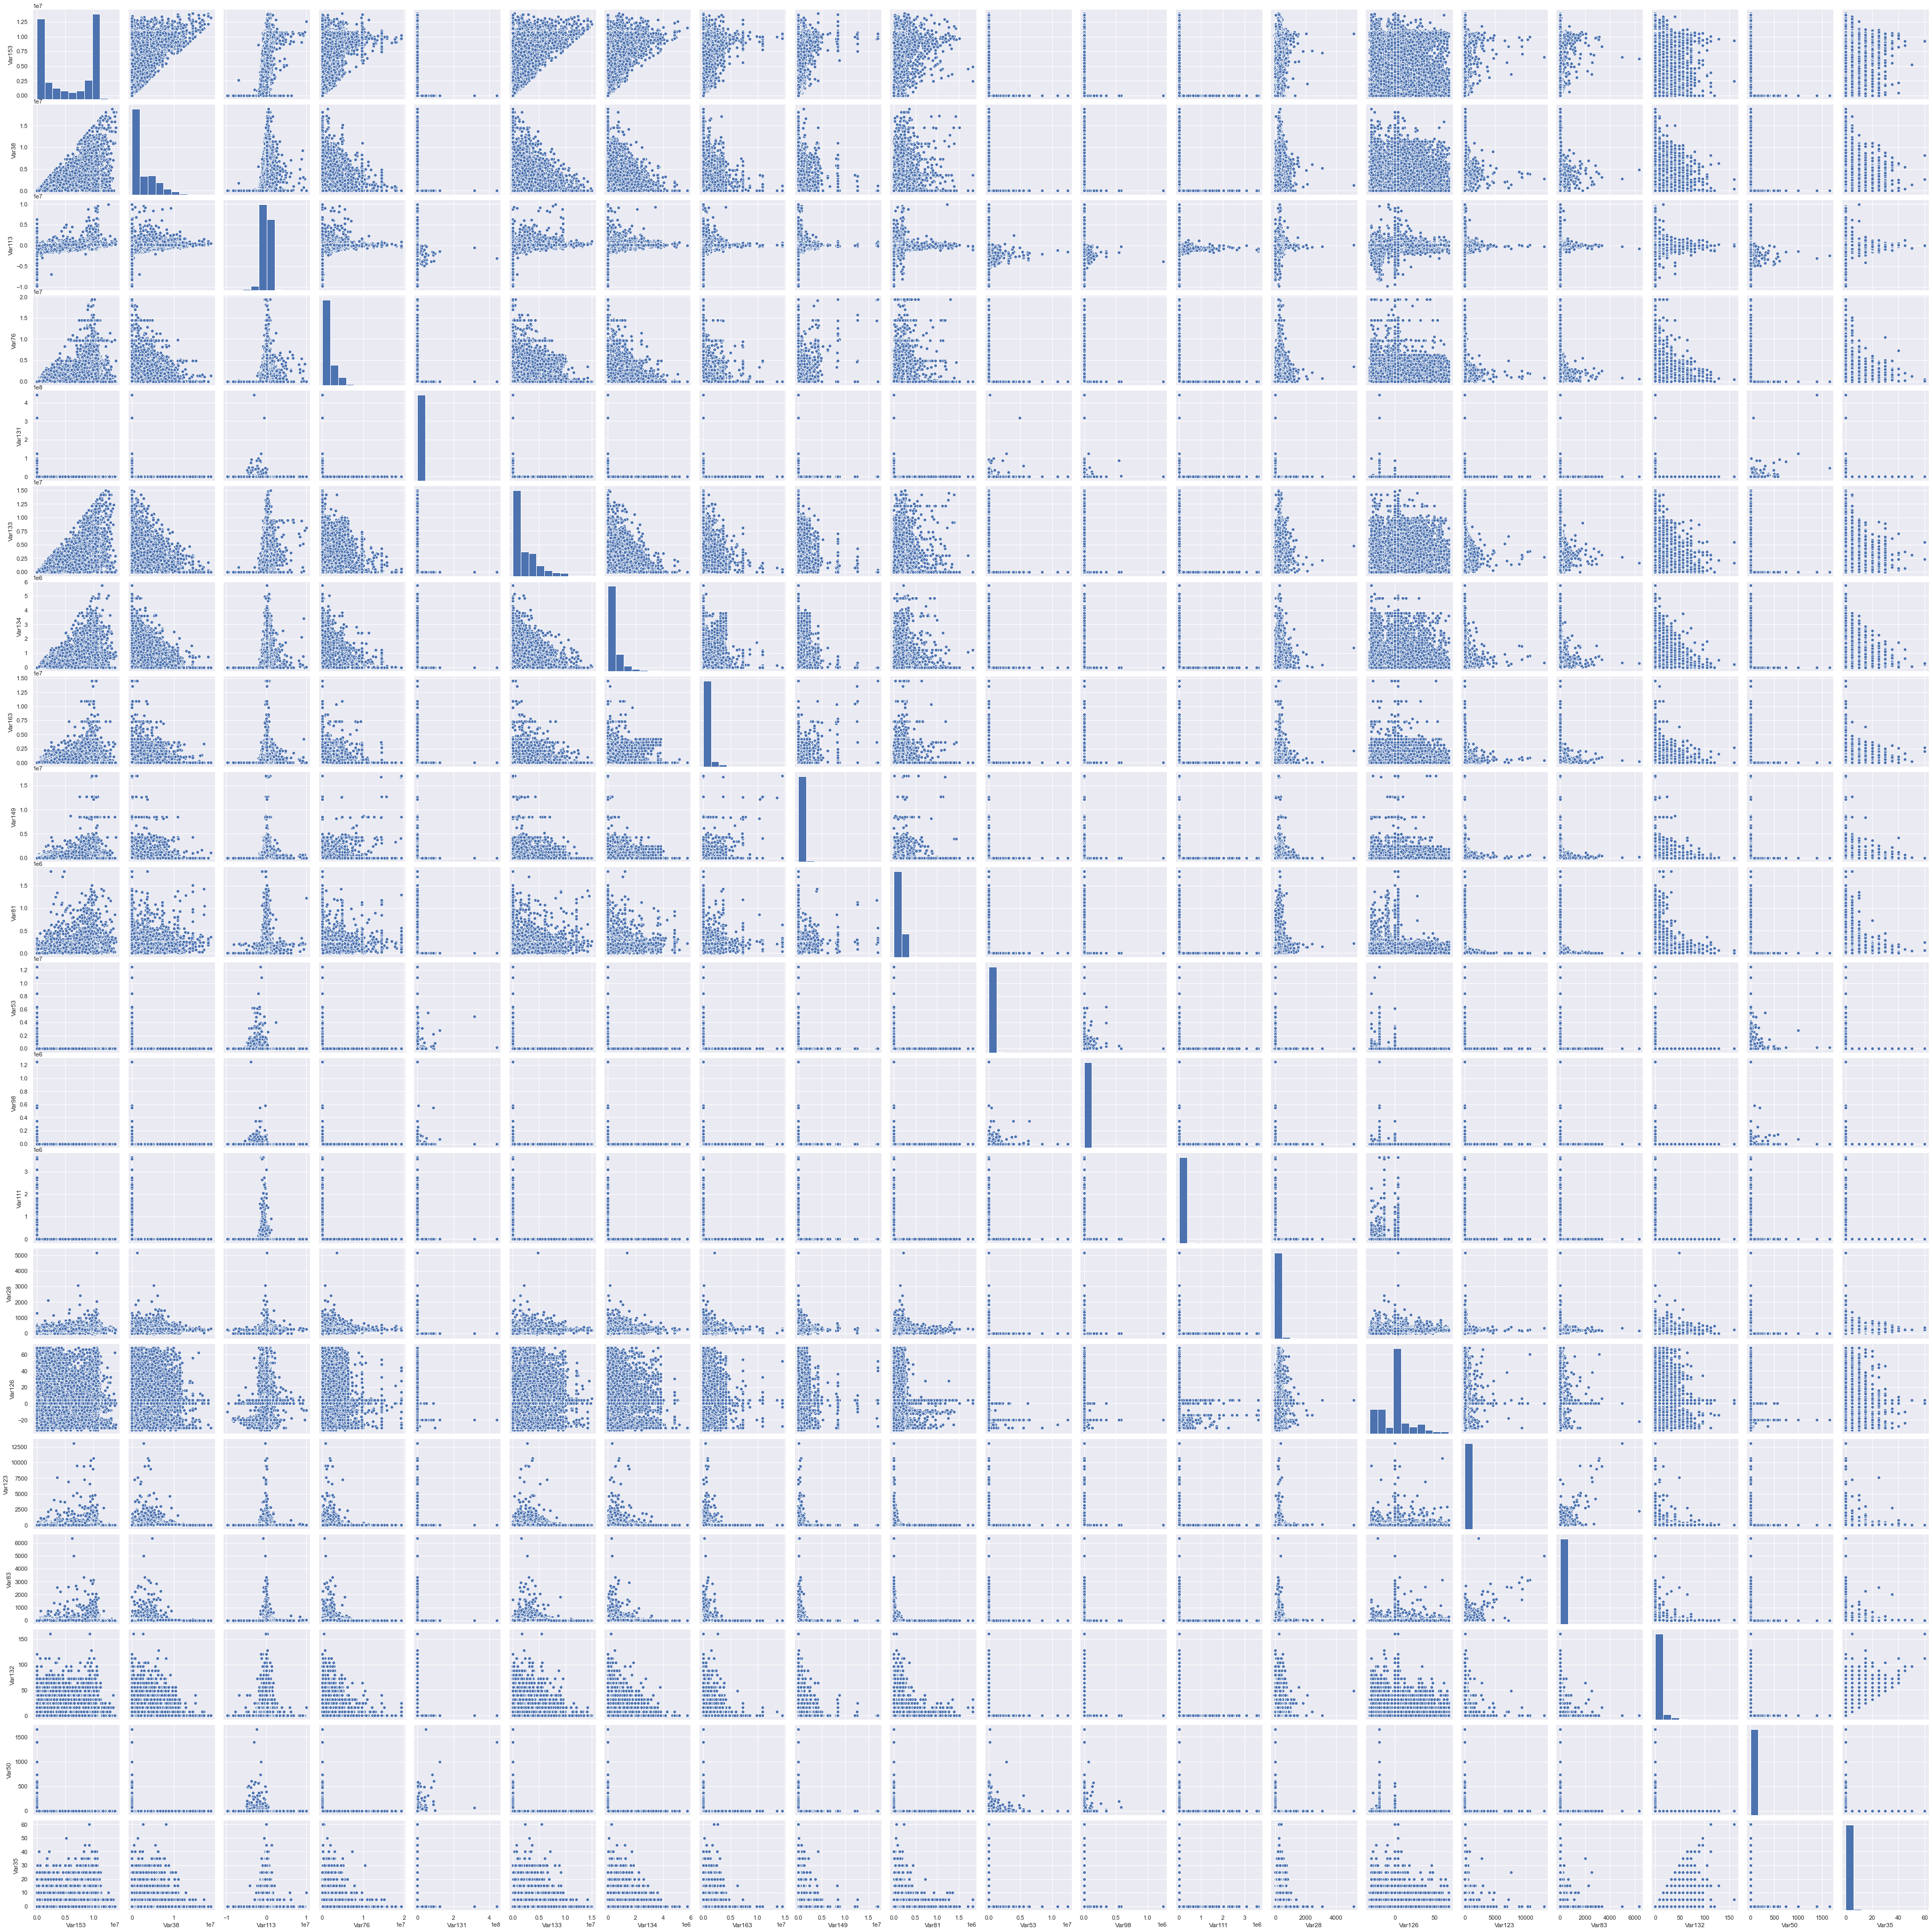

In [206]:
sns.pairplot(numeric_data.loc[:, direct_corr.index])

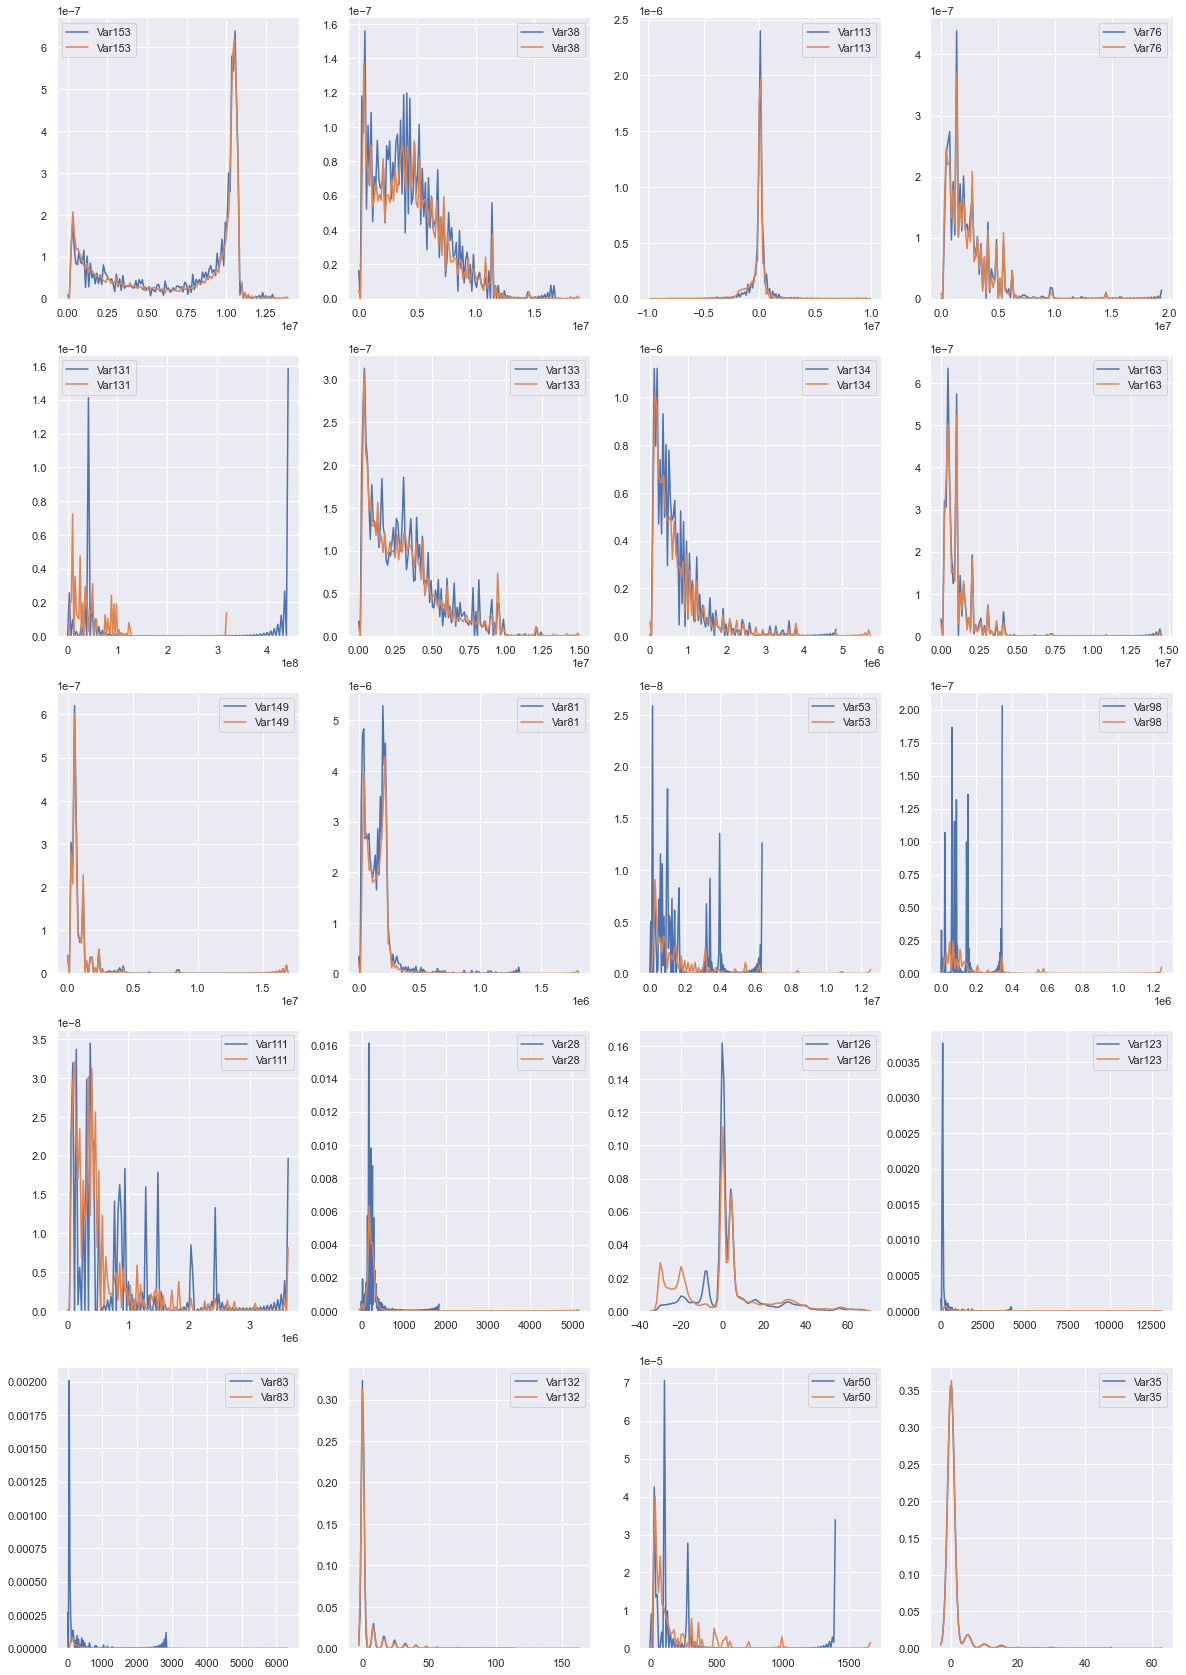

In [208]:
fig, axes = plt.subplots(5, 4, figsize = (20, 30))
sns.set(color_codes=True)
n = 0
for idx in direct_corr.index:
    sns.kdeplot(numeric_data[labels.target==1].loc[:, idx], ax=axes[n // 4, n % 4], bw=1)
    sns.kdeplot(numeric_data[labels.target==-1].loc[:, idx], ax=axes[n // 4, n % 4], bw=1)
    n += 1

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

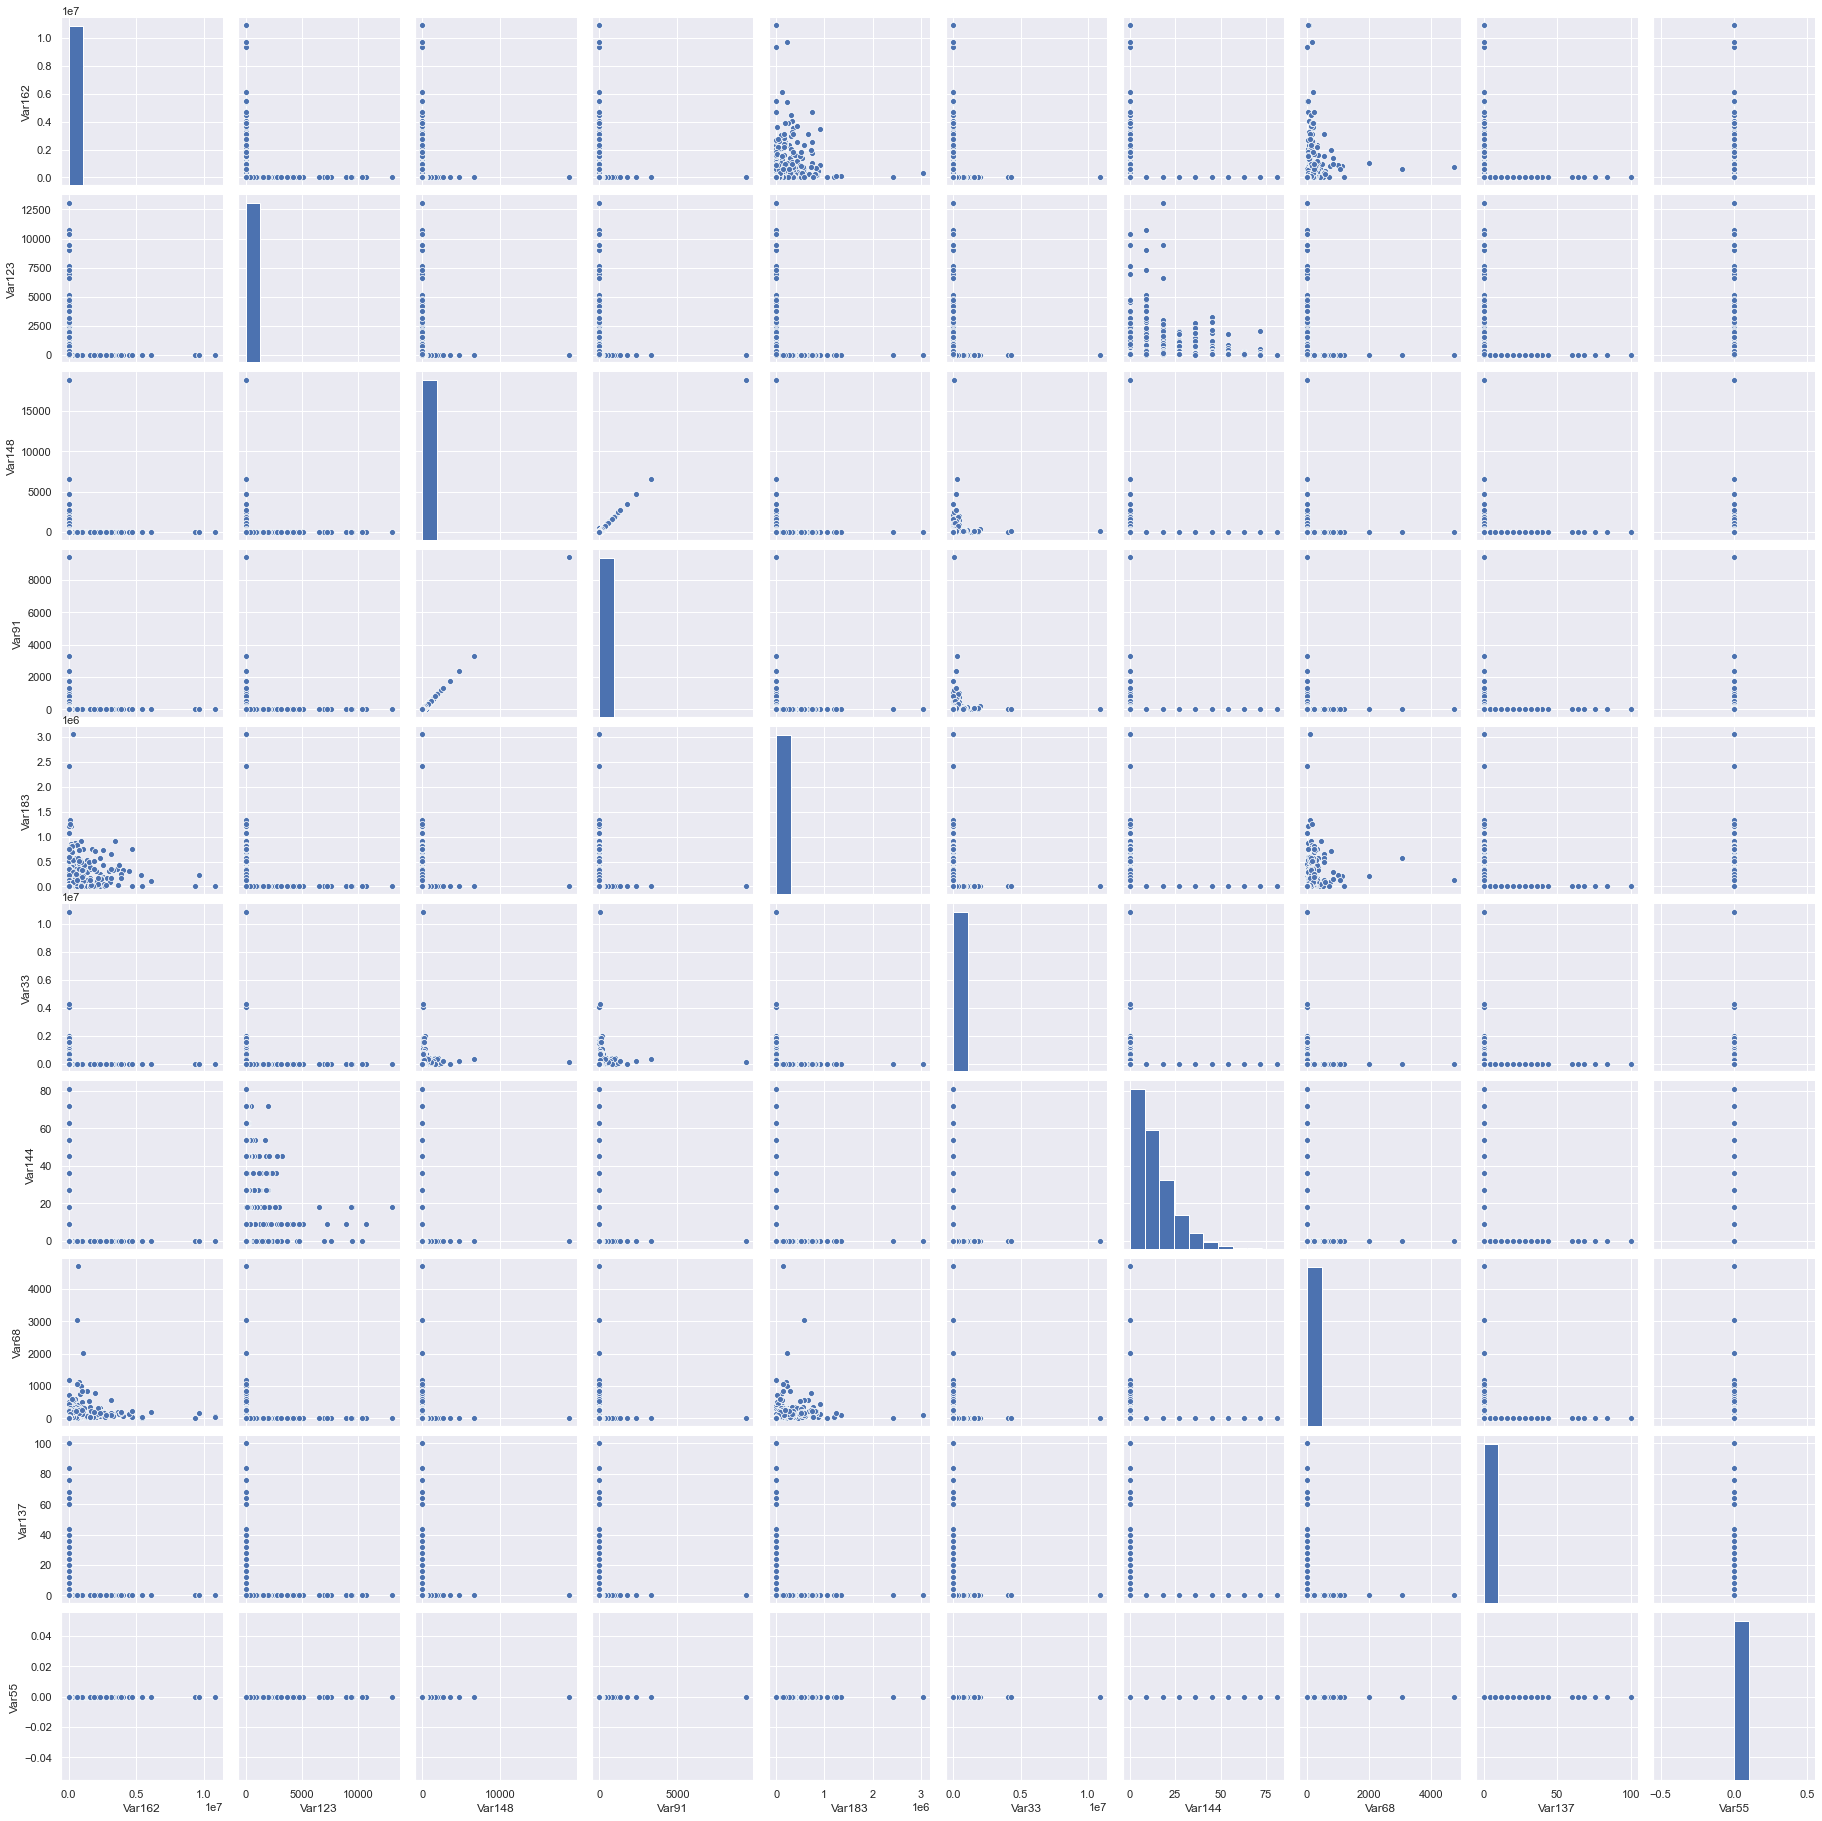

In [184]:
np.random.RandomState(17)
random_idx = np.random.randint(190, size = 10)
sns.pairplot(numeric_data.iloc[:, random_idx])

C:\Users\nspap\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nspap\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


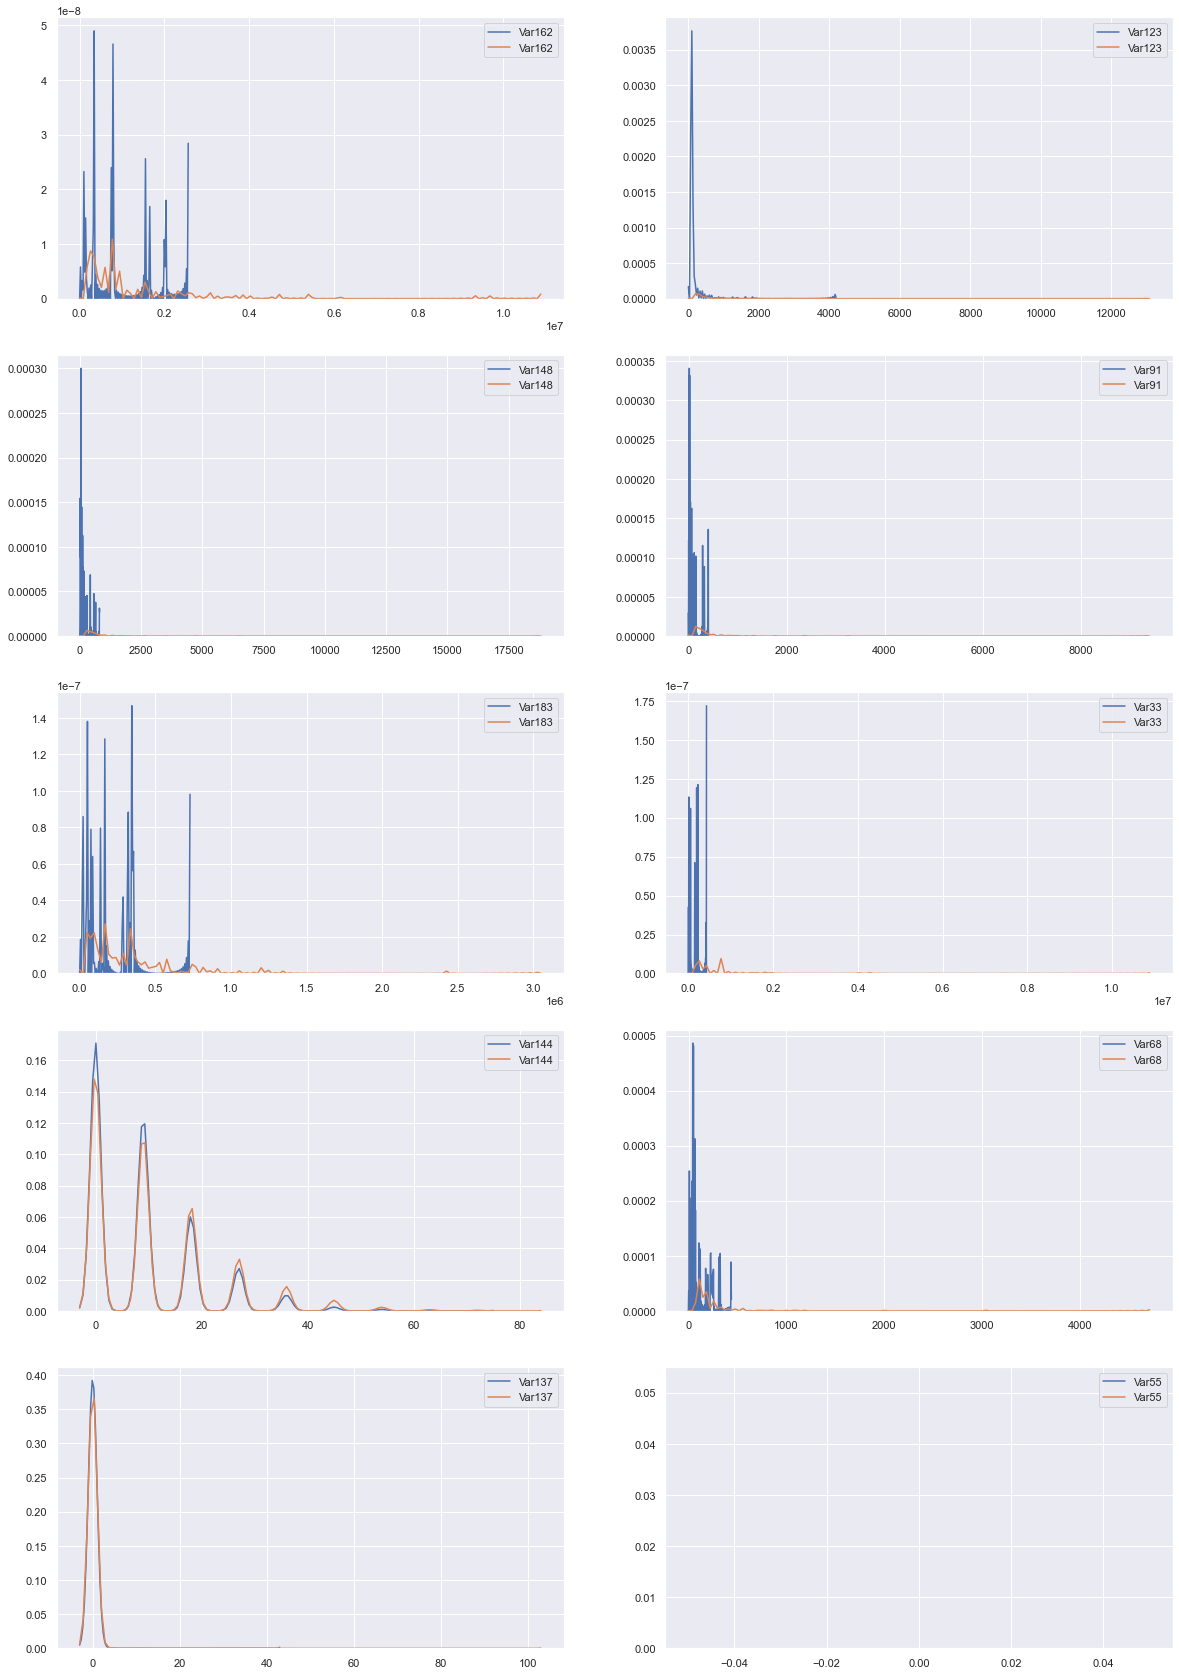

In [194]:
fig, axes = plt.subplots(5, 2, figsize = (20, 30))
n = 0
for idx in random_idx:
    sns.kdeplot(numeric_data[labels.target==1].iloc[:, idx], ax=axes[n // 2, n % 2], bw=1)
    sns.kdeplot(numeric_data[labels.target==-1].iloc[:, idx], ax=axes[n // 2, n % 2], bw=1)
    n += 1

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

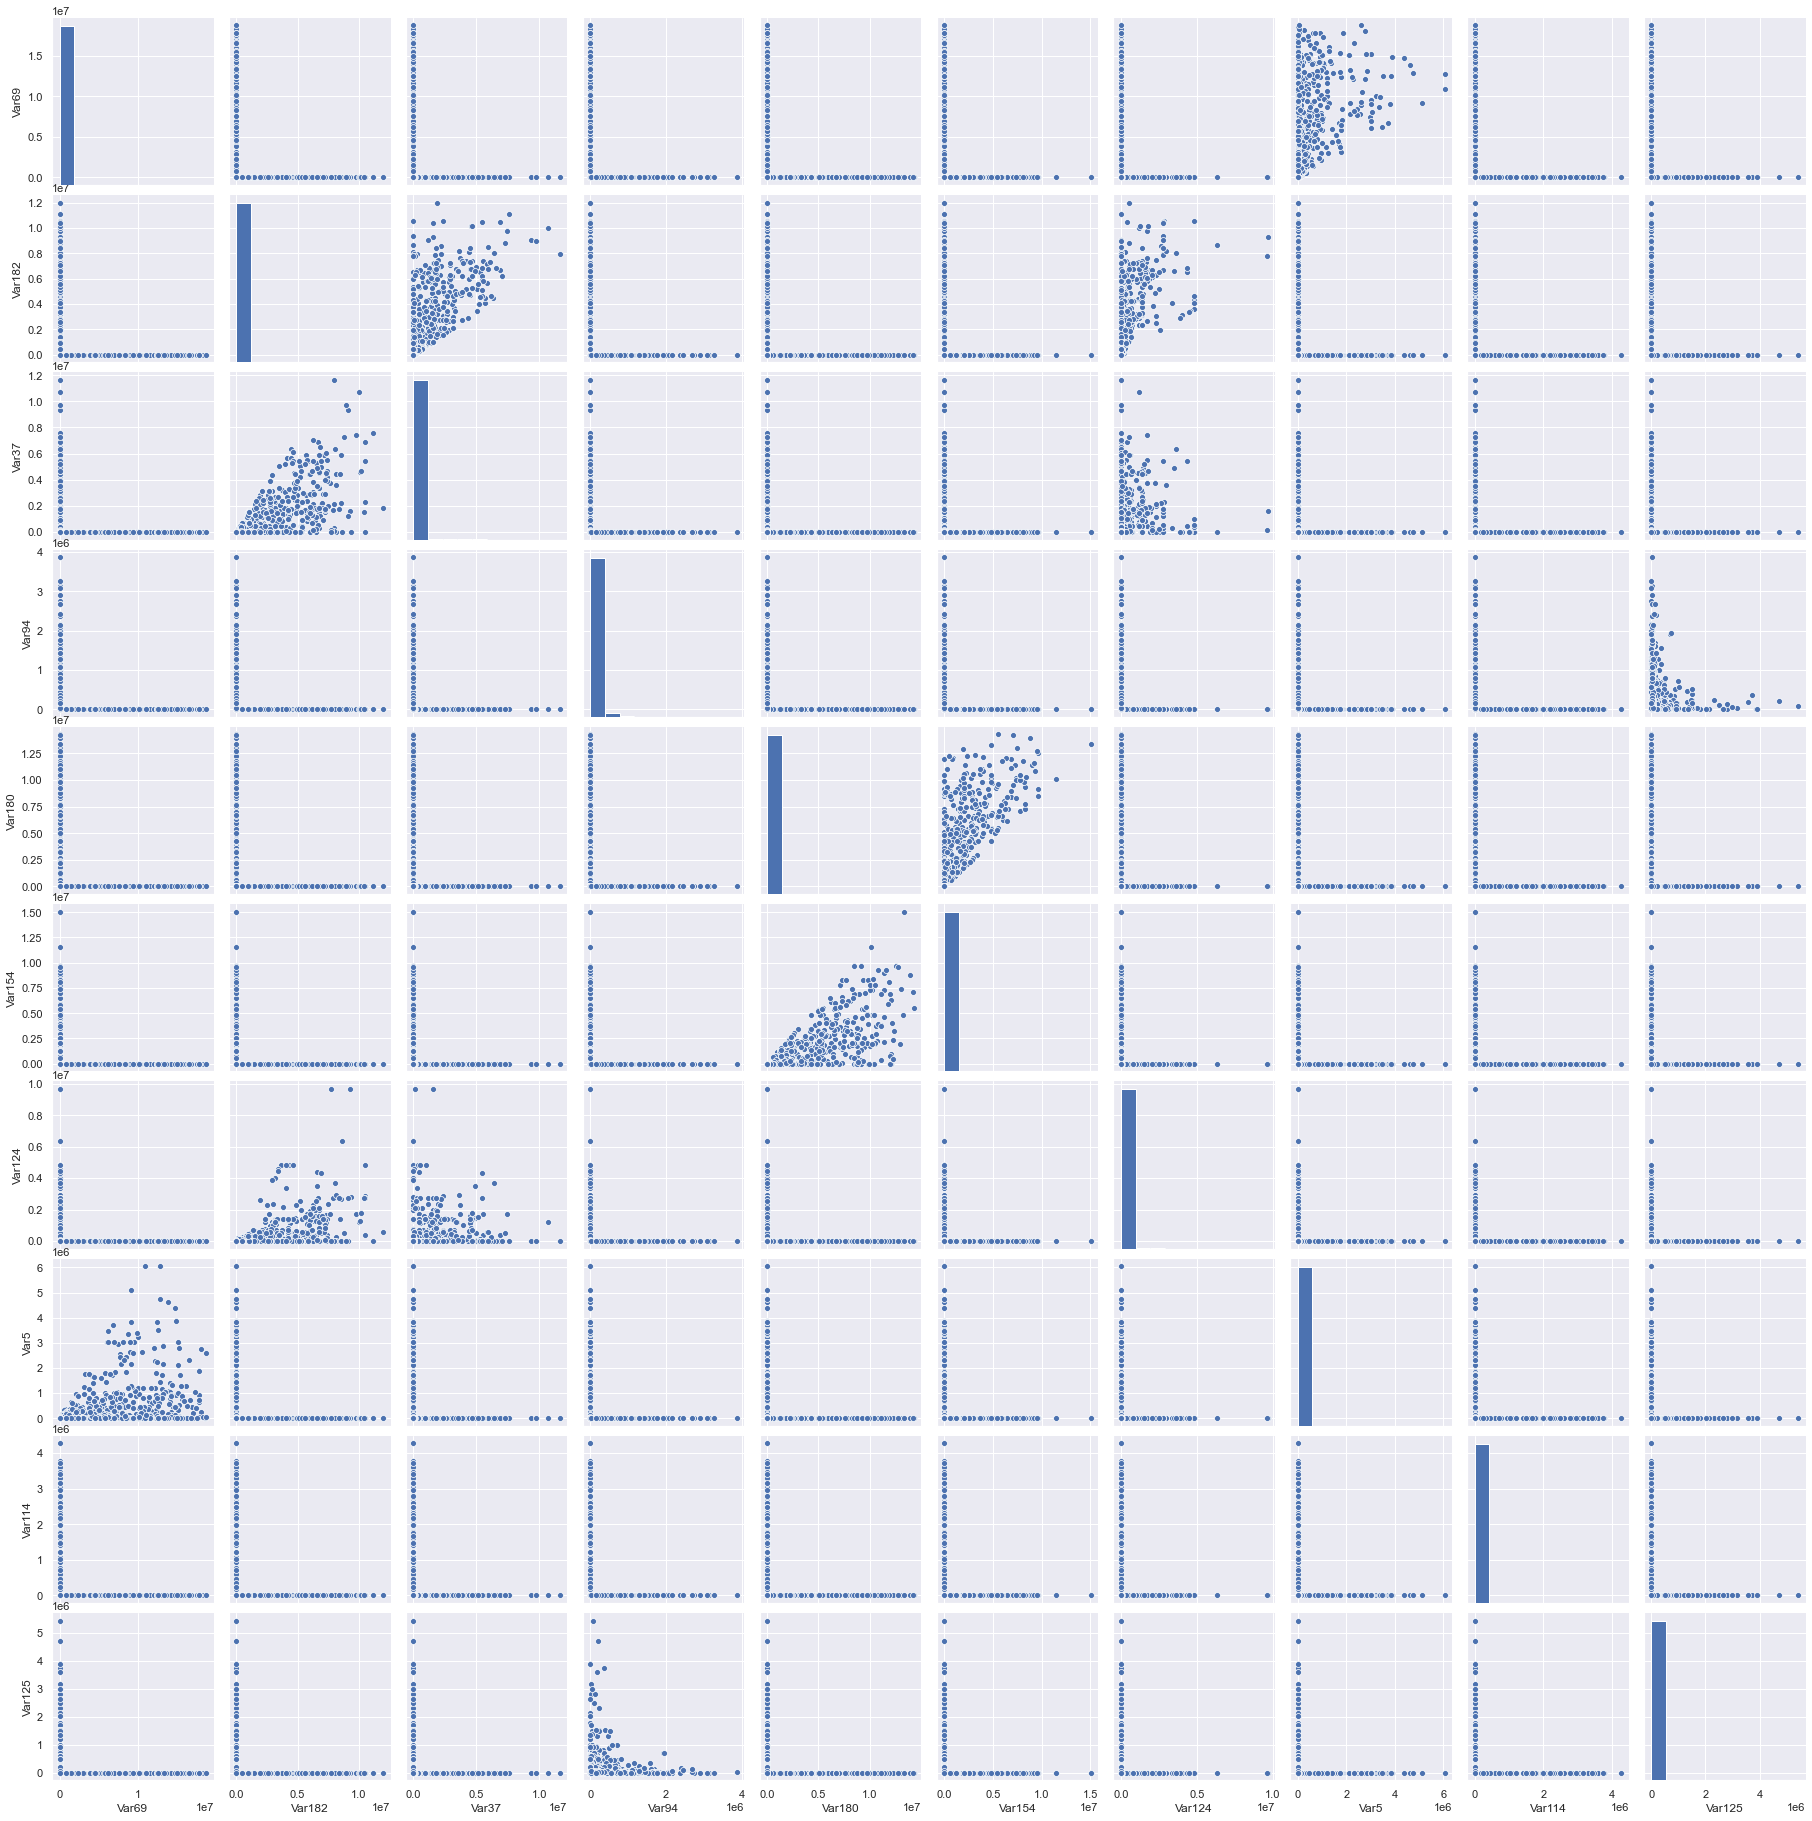

In [209]:
inverse_corr = c.sort_values()[:10]
sns.pairplot(numeric_data.loc[:, inverse_corr.index])

In [268]:
inverse_corr

Var69    -30104.212952
Var182   -21456.427189
Var37     -9983.270001
Var94     -6990.107266
Var180    -6465.575663
Var154    -5999.430465
Var124    -5555.592555
Var5      -4069.214919
Var114    -4065.157032
Var125    -3876.422349
dtype: float64

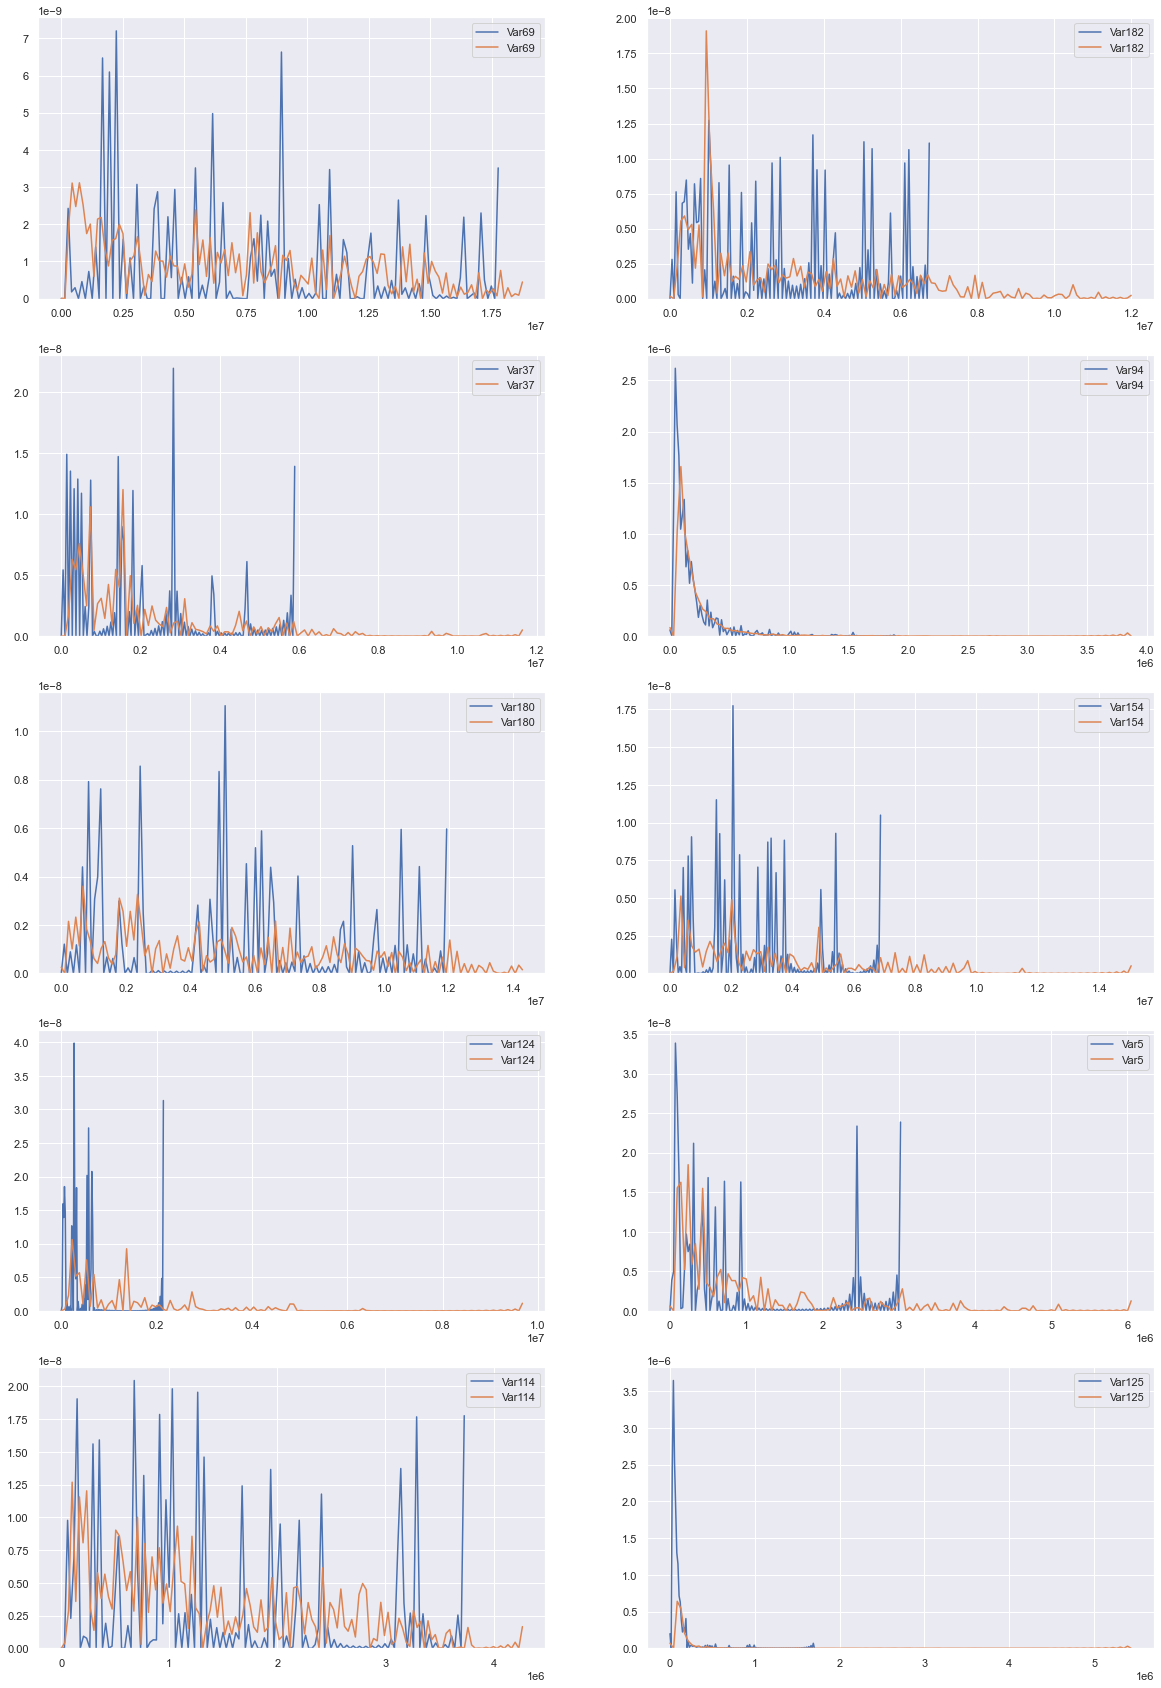

In [210]:
fig, axes = plt.subplots(5, 2, figsize = (20, 30))
n = 0
for idx in inverse_corr.index:
    sns.kdeplot(numeric_data[labels.target==1].loc[:, idx], ax=axes[n // 2, n % 2], bw=1)
    sns.kdeplot(numeric_data[labels.target==-1].loc[:, idx], ax=axes[n // 2, n % 2], bw=1)
    n += 1

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [222]:
categorial_data = train_data.iloc[:, 190:]
categorial_data.head()

Var191      Var192            Var193 Var194 Var195 Var196 Var197   Var198  \
0    NaN  NESt0G8EIb           AERks4l    NaN   taul   1K8T   0LaQ  UaKK0yW   
1    NaN  P1WvyxLp3Z           2Knk1KF    NaN   taul   1K8T   YFAj  Bnunsla   
2    NaN  FoxgUHSK8h  LrdZy8QqgUfkVShG    NaN   taul   1K8T   TyGl  fhk21Ss   
3    NaN  vNEvyxLp3Z              RO12    NaN   taul   1K8T   0Xwj  uoZk2Zj   
4    NaN  4e7gUH7IEC              RO12    NaN   taul   1K8T   vSNn  kugYdIL   

       Var199   Var200  ...   Var221   Var222      Var223 Var224 Var225  \
0  I1sFbv_0IT      NaN  ...  Al6ZaUT  vr93T2a  LM8l689qOp    NaN    NaN   
1     o64y9zI  DlISMzi  ...     oslk  6hQ9lNX  LM8l689qOp    NaN   ELof   
2  nQUveAzAF7      NaN  ...     zCkv  catzS2D  LM8l689qOp    NaN    NaN   
3  LWyxgtXeJL      NaN  ...     oslk  e4lqvY0  LM8l689qOp    NaN    NaN   
4  ZIXKpoNpqq      NaN  ...     oslk  MAz3HNj  LM8l689qOp    NaN    NaN   

  Var226   Var227         Var228  Var229 Var230  
0   fKCe  02N6s8f  xwM2aC7IdeMC0     NaN    NaN  
1   xb3V     RAYp        55YFVY9    mj86    NaN  
2   FSa2     ZI9m  ib5G6X1eUxUn6    mj86    NaN  
3   xb3V     RAYp  F2FyR07IdsN7I     NaN    NaN  
4   WqMG     RAYp  F2FyR07IdsN7I     NaN    NaN  

[5 rows x 40 columns]

In [265]:
categorial_data.shape

(40000, 40)

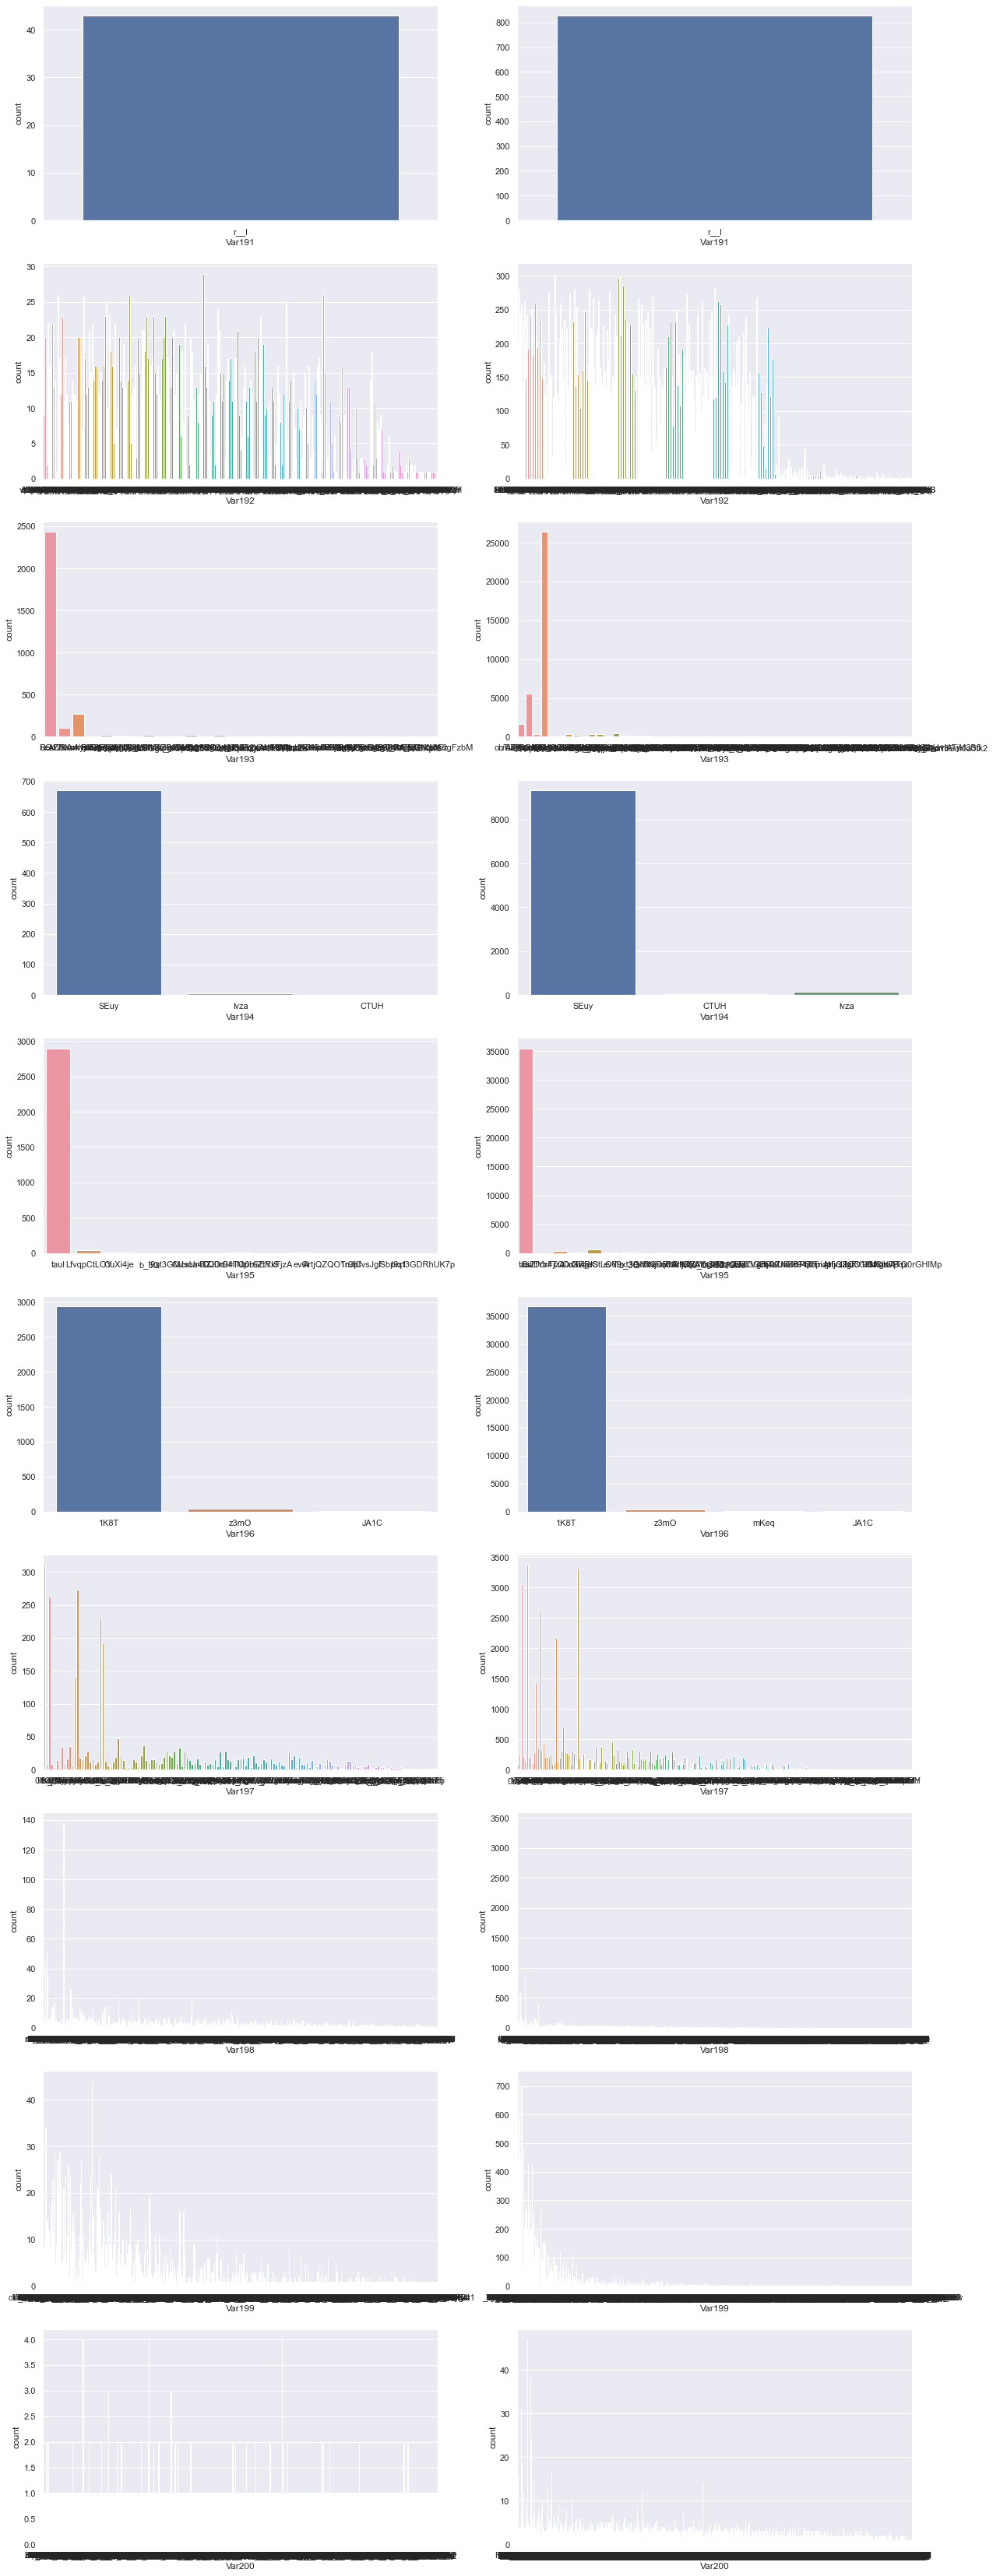

In [267]:
fig, axes = plt.subplots(10,2, figsize = (20,60))
for y in range(10):
    sns.countplot(categorial_data.iloc[:, y][labels['target'] == 1], ax = axes[y,0])
    sns.countplot(categorial_data.iloc[:, y][labels['target'] == -1], ax = axes[y,1])

In [274]:
print(numeric_data.loc[:, 'Var8'].value_counts())
print(numeric_data.loc[:, 'Var15'].value_counts())
print(numeric_data.loc[:, 'Var20'].value_counts())

0.0    40000
Name: Var8, dtype: int64
0.0    40000
Name: Var15, dtype: int64
0.0    40000
Name: Var20, dtype: int64


8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?

Данные очень разрежены, есть признаки, значения которых по всем объектам - NaN

* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?

Наиболее вероятно переменные с наибольшей корреляцией, например Var153, Var38, Var113

* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?

Те, в которых все или большинство значений - NaN, например Var8, Var15, Var20

* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Да, отбор признаков будет полезным для модели.